In [11]:
from qiskit import Aer, IBMQ, QuantumCircuit, execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from IPython.core.display import display
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации


In [12]:
# Создаем квантовую схему с одним кубитом и одним классическим битом
qc = QuantumCircuit(1, 1)

# Применяем Hadamard для перевода кубита в состояние суперпозиции
qc.h(0)

# Добавляем измерение
qc.measure(0, 0)

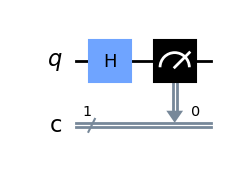

In [13]:
# Визуализируем квантовую схему
qc.draw("mpl")  # Отображаем схему в формате matplotlib

Результаты измерения: {'1': 498, '0': 526}


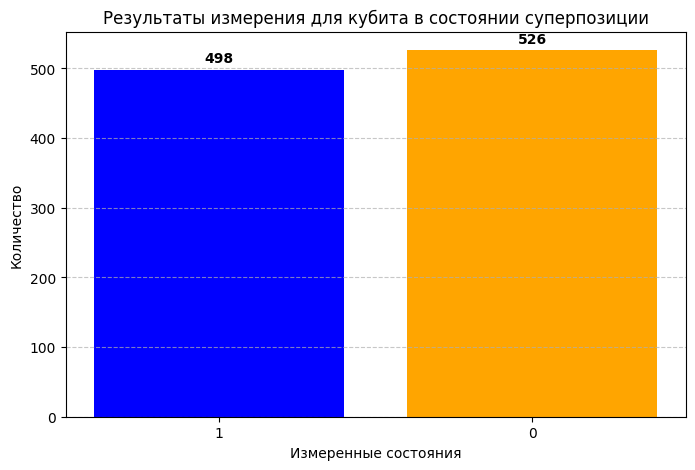

In [14]:
# Компилируем и выполняем схему на симуляторе
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()

# Получаем результаты измерения
counts = result.get_counts(qc)
labels = list(counts.keys())
values = list(counts.values())
print("Результаты измерения:", counts)

# Визуализируем результаты
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Результаты измерения для кубита в состоянии суперпозиции')  # Заголовок графика
plt.xlabel('Измеренные состояния')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
# Добавление значений над столбцами
for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.show()  # Отображаем график